In [7]:
import os

In [8]:
import pandas as pd

In [9]:
os.chdir("D:\crop-yield-project")

In [10]:
agri_data=pd.read_csv('Crops_data.csv')
print(agri_data.head())

   Dist Code  Year  State Code    State Name Dist Name  RICE AREA (1000 ha)  \
0          1  2010          14  Chhattisgarh      Durg               777.92   
1          1  2011          14  Chhattisgarh      Durg               806.55   
2          1  2012          14  Chhattisgarh      Durg               807.07   
3          1  2013          14  Chhattisgarh      Durg               819.44   
4          1  2014          14  Chhattisgarh      Durg               834.87   

   RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  WHEAT AREA (1000 ha)  \
0                      1319.18                 1695.77                 46.12   
1                      1416.48                 1756.23                 44.98   
2                      1534.22                 1900.97                 43.87   
3                      1296.24                 1581.86                 41.54   
4                      1444.24                 1729.89                 44.25   

   WHEAT PRODUCTION (1000 tons)  ...  SUGARC

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [12]:
# Load the full dataset
agri_data = pd.read_csv('Crops_data.csv')

# Preview the first few rows
print(agri_data.head())


   Dist Code  Year  State Code    State Name Dist Name  RICE AREA (1000 ha)  \
0          1  2010          14  Chhattisgarh      Durg               777.92   
1          1  2011          14  Chhattisgarh      Durg               806.55   
2          1  2012          14  Chhattisgarh      Durg               807.07   
3          1  2013          14  Chhattisgarh      Durg               819.44   
4          1  2014          14  Chhattisgarh      Durg               834.87   

   RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  WHEAT AREA (1000 ha)  \
0                      1319.18                 1695.77                 46.12   
1                      1416.48                 1756.23                 44.98   
2                      1534.22                 1900.97                 43.87   
3                      1296.24                 1581.86                 41.54   
4                      1444.24                 1729.89                 44.25   

   WHEAT PRODUCTION (1000 tons)  ...  SUGARC

In [13]:
# Remove duplicate rows
agri_data.drop_duplicates(inplace=True)

# Drop rows with missing values
agri_data.dropna(inplace=True)

# Confirm shape after cleaning
print("Cleaned shape:", agri_data.shape)


Cleaned shape: (2484, 80)


In [14]:
# Identify object-type columns (categorical)
cat_cols = agri_data.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", cat_cols)

# One-hot encode categorical columns
agri_data = pd.get_dummies(agri_data, columns=cat_cols)

# Confirm new shape
print("Shape after encoding:", agri_data.shape)


Categorical columns: ['State Name', 'Dist Name']
Shape after encoding: (2484, 409)


In [15]:
# Identify numeric columns
num_cols = agri_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Initialize scaler
scaler = MinMaxScaler()

# Apply normalization
agri_data[num_cols] = scaler.fit_transform(agri_data[num_cols])

# Preview normalized data
print(agri_data[num_cols].head())


   Dist Code      Year  State Code  RICE AREA (1000 ha)  \
0        0.0  0.000000    0.684211             0.673973   
1        0.0  0.142857    0.684211             0.698778   
2        0.0  0.285714    0.684211             0.699228   
3        0.0  0.428571    0.684211             0.709945   
4        0.0  0.571429    0.684211             0.723313   

   RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  WHEAT AREA (1000 ha)  \
0                     0.410319                0.299933              0.052439   
1                     0.440583                0.310627              0.051143   
2                     0.477205                0.336227              0.049881   
3                     0.403184                0.279786              0.047232   
4                     0.449218                0.305968              0.050313   

   WHEAT PRODUCTION (1000 tons)  WHEAT YIELD (Kg per ha)  \
0                      0.010654                 0.179498   
1                      0.011657             

In [16]:
import pandas as pd

In [17]:
import numpy as np

In [18]:
import matplotlib.pyplot as plt

In [19]:
agri_data=pd.read_csv('Crops_data.csv')

In [20]:
agri_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    2484 non-null   int64  
 1   Year                                         2484 non-null   int64  
 2   State Code                                   2484 non-null   int64  
 3   State Name                                   2484 non-null   object 
 4   Dist Name                                    2484 non-null   object 
 5   RICE AREA (1000 ha)                          2484 non-null   float64
 6   RICE PRODUCTION (1000 tons)                  2484 non-null   float64
 7   RICE YIELD (Kg per ha)                       2484 non-null   float64
 8   WHEAT AREA (1000 ha)                         2484 non-null   float64
 9   WHEAT PRODUCTION (1000 tons)                 2484 non-null   float64
 10  

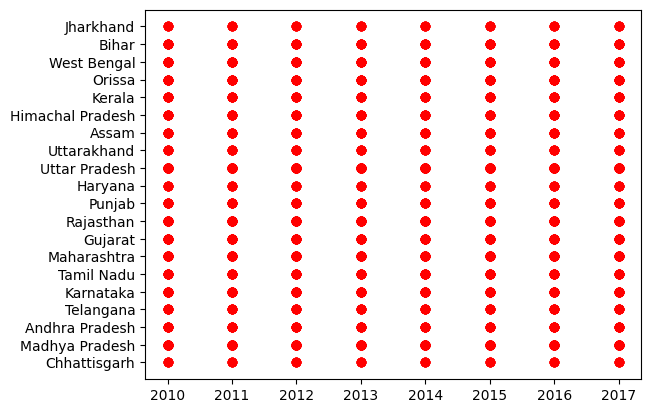

In [21]:
plt.scatter(agri_data['Year'],agri_data['State Name'],c='red')

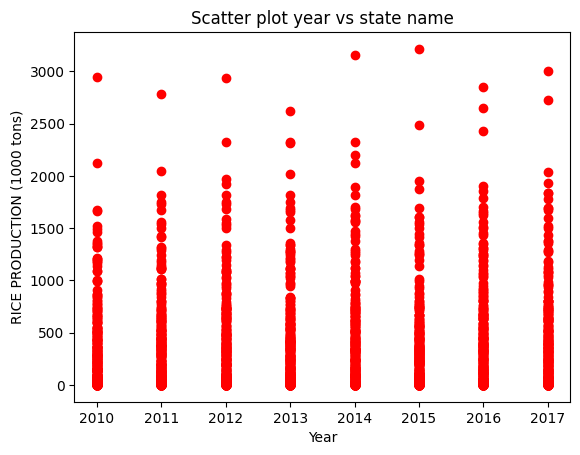

In [22]:
plt.scatter(agri_data['Year'],agri_data['RICE PRODUCTION (1000 tons)'],c='red')
plt.title('Scatter plot year vs state name')
plt.xlabel('Year')
plt.ylabel('RICE PRODUCTION (1000 tons)')
plt.show()

(array([1815.,  420.,  150.,   67.,   16.,    9.,    7.]),
 array([   0.        ,  459.28714286,  918.57428571, 1377.86142857,
        1837.14857143, 2296.43571429, 2755.72285714, 3215.01      ]),
 <BarContainer object of 7 artists>)

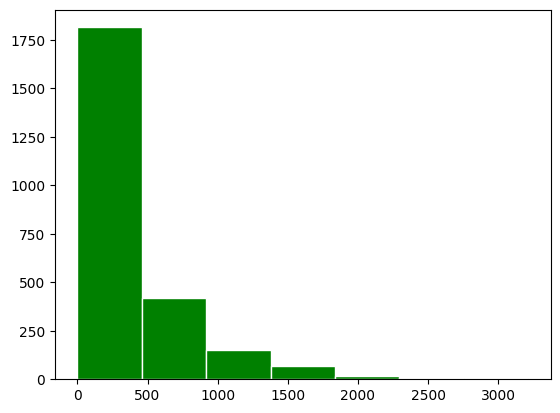

In [23]:
plt.hist(agri_data['RICE PRODUCTION (1000 tons)'],color='green',edgecolor='white',bins=7)

In [25]:
print(agri_data.columns.tolist())


['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name', 'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)', 'RICE YIELD (Kg per ha)', 'WHEAT AREA (1000 ha)', 'WHEAT PRODUCTION (1000 tons)', 'WHEAT YIELD (Kg per ha)', 'KHARIF SORGHUM AREA (1000 ha)', 'KHARIF SORGHUM PRODUCTION (1000 tons)', 'KHARIF SORGHUM YIELD (Kg per ha)', 'RABI SORGHUM AREA (1000 ha)', 'RABI SORGHUM PRODUCTION (1000 tons)', 'RABI SORGHUM YIELD (Kg per ha)', 'SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)', 'SORGHUM YIELD (Kg per ha)', 'PEARL MILLET AREA (1000 ha)', 'PEARL MILLET PRODUCTION (1000 tons)', 'PEARL MILLET YIELD (Kg per ha)', 'MAIZE AREA (1000 ha)', 'MAIZE PRODUCTION (1000 tons)', 'MAIZE YIELD (Kg per ha)', 'FINGER MILLET AREA (1000 ha)', 'FINGER MILLET PRODUCTION (1000 tons)', 'FINGER MILLET YIELD (Kg per ha)', 'BARLEY AREA (1000 ha)', 'BARLEY PRODUCTION (1000 tons)', 'BARLEY YIELD (Kg per ha)', 'CHICKPEA AREA (1000 ha)', 'CHICKPEA PRODUCTION (1000 tons)', 'CHICKPEA YIELD (Kg per ha)',

<Axes: xlabel='Year', ylabel='RICE PRODUCTION (1000 tons)'>

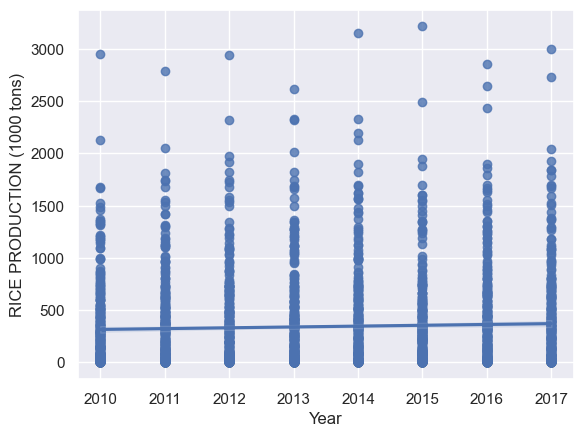

In [26]:
import seaborn as sns
sns.set(style="darkgrid")
sns.regplot(x=agri_data['Year'],y=agri_data['RICE PRODUCTION (1000 tons)'])

<Axes: xlabel='Year', ylabel='RICE PRODUCTION (1000 tons)'>

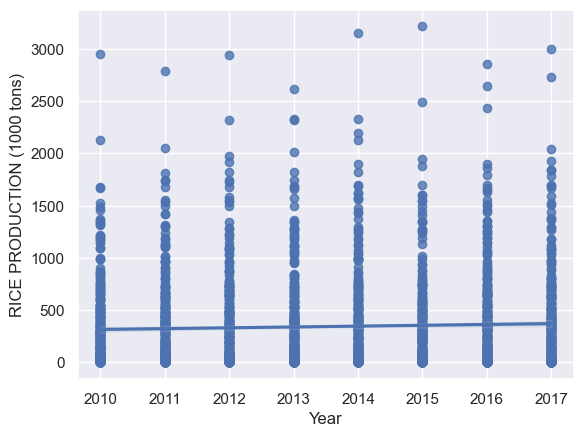

In [27]:
sns.regplot(x=agri_data['Year'],y=agri_data['RICE PRODUCTION (1000 tons)'],fit_reg=True)


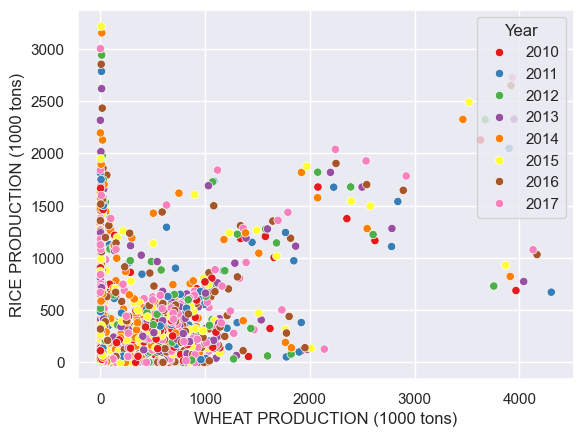

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.scatterplot(
    x='WHEAT PRODUCTION (1000 tons)',
    y='RICE PRODUCTION (1000 tons)',
    data=agri_data,
    hue='Year',
    legend=True,
    palette="Set1"
)
plt.show()

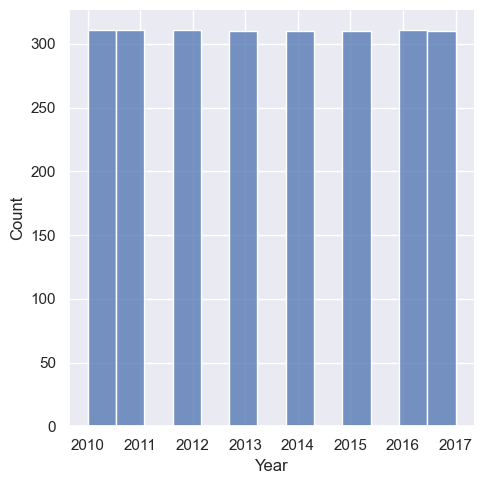

In [29]:
sns.displot(agri_data['Year'])

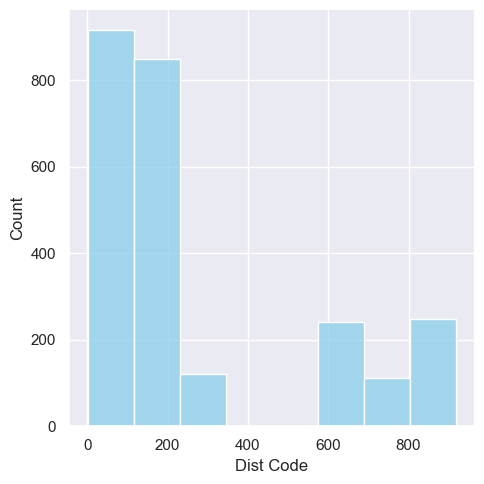

In [30]:
sns.displot(
    data=agri_data,
    x='Dist Code',
    bins=len(agri_data['Year'].unique()),  # One bin per year
    kde=False,
    color='skyblue'
)


<Axes: xlabel='Year', ylabel='count'>

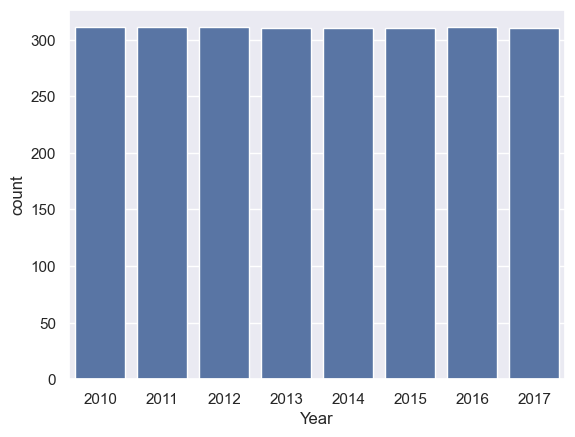

In [31]:
sns.countplot(x="Year",data=agri_data)

<Axes: xlabel='RICE PRODUCTION (1000 tons)', ylabel='count'>

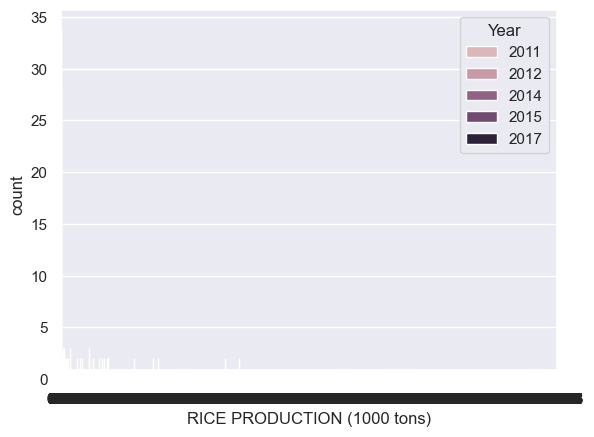

In [32]:
sns.countplot(x="RICE PRODUCTION (1000 tons)",data=agri_data,hue="Year")

<Axes: xlabel='RICE PRODUCTION (1000 tons)', ylabel='State Code'>

C:\Users\ganes_kxvl8b7\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\events.py:82: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

C:\Users\ganes_kxvl8b7\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



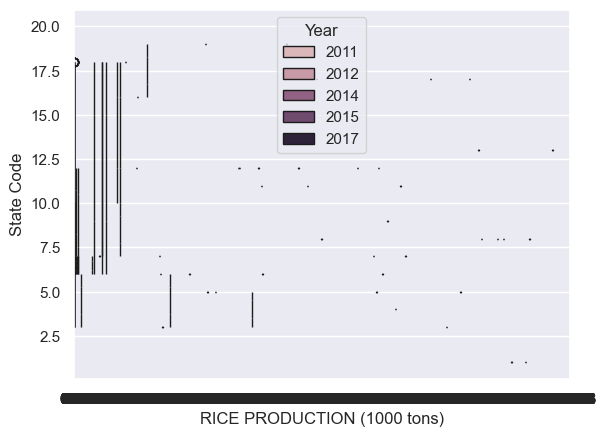

In [33]:
sns.boxplot(x="RICE PRODUCTION (1000 tons)",y=agri_data['State Code'],data=agri_data,hue="Year")

In [34]:
import pandas as pd

X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")


In [35]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1987, 408)
y_train shape: (1987, 1)
X_test shape: (497, 408)
y_test shape: (497, 1)


In [36]:
print(X_train.head())
print(y_train.head())


   Dist Code      Year  State Code  RICE AREA (1000 ha)  \
0   0.989083  1.000000    0.052632             0.166249   
1   0.099345  0.142857    0.526316             0.105352   
2   0.028384  0.571429    0.263158             0.005198   
3   0.070961  0.142857    0.210526             0.024640   
4   0.108079  0.000000    0.315789             0.024605   

   RICE PRODUCTION (1000 tons)  WHEAT AREA (1000 ha)  \
0                     0.185928              0.169053   
1                     0.137471              0.000000   
2                     0.006429              0.158046   
3                     0.024771              0.000000   
4                     0.009760              0.060262   

   WHEAT PRODUCTION (1000 tons)  WHEAT YIELD (Kg per ha)  \
0                      0.116165                 0.607046   
1                      0.000000                 0.000000   
2                      0.128208                 0.716630   
3                      0.000000                 0.000000   
4       

In [38]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train.values.ravel())
print("Test R² Score:", model.score(X_test, y_test))


Test R² Score: 0.8917018838217947


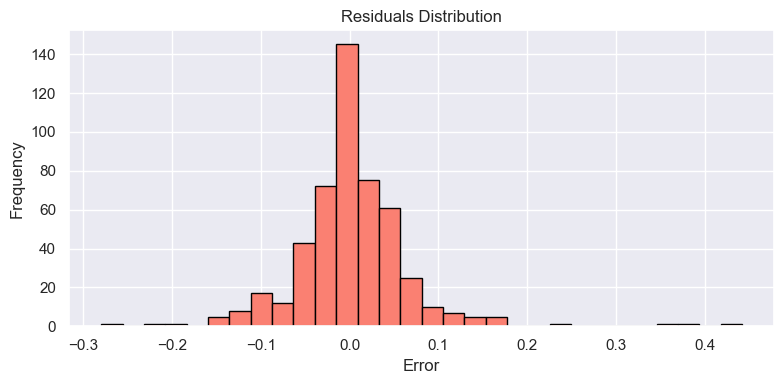

In [71]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
residuals = y_test.values.ravel() - y_pred

plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=30, color='salmon', edgecolor='black')
plt.title("Residuals Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [74]:
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 2.0 MB/s eta 0:00:29
    --------------------------------------- 1.0/56.8 MB 2.1 MB/s eta 0:00:28
    --------------------------------------- 1.3/56.8 MB 2.0 MB/s eta 0:00:28
   - -------------------------------------- 1.8/56.8 MB 2.0 MB/s eta 0:00:27
   - -------------------------------------- 2.4/56.8 MB 2.0 MB/s eta 0:00:28
   - -------------------------------------- 2.6/56.8 MB 2.0 MB/s eta 0:00:27
   -- ------------------------------------- 3.1/56.8 MB 2.0 MB/s eta 0:00:27
   -- ------------------------------------- 3.4/56.8 MB 1.9 MB/s eta 0:00:28
   -- ------------------------------------- 3.9/56.8 MB 2.0 MB/s eta 0:00:27
   --- ------------------------------------ 4.5/56.8 MB 2.0 MB/s eta 0:00:26
   --- ------------------------------------ 4.7/56.8 MB 2.0 MB/s eta 0:00:26
   --- ------

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor  # if installed

models = {
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train.values.ravel())
    score = model.score(X_test, y_test)
    print(f"{name} R² Score: {score:.4f}")


Linear Regression R² Score: 0.8809
Gradient Boosting R² Score: 0.8622
XGBoost R² Score: 0.9145


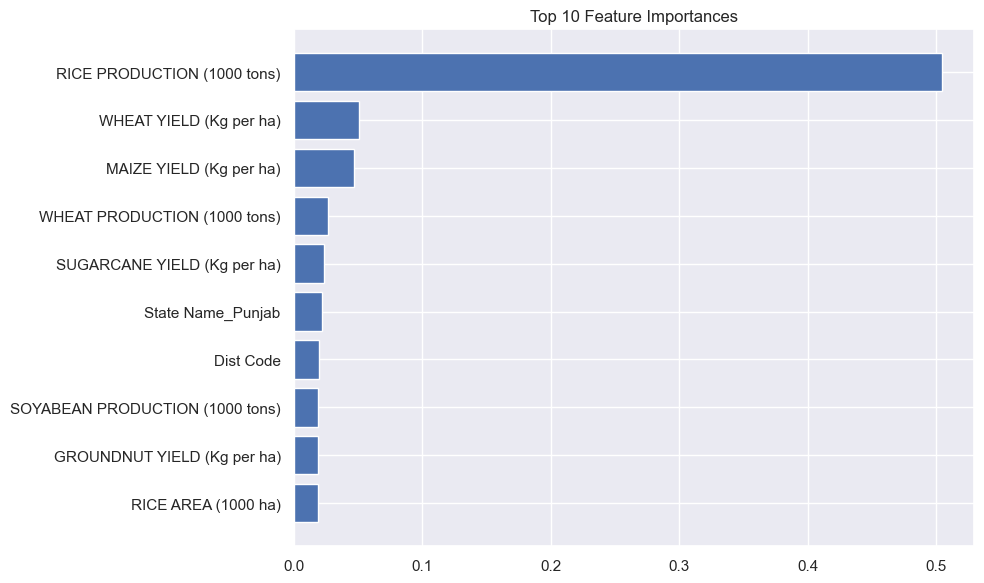

In [72]:
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()


In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor  # if installed

models = {
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train.values.ravel())
    score = model.score(X_test, y_test)
    print(f"{name} R² Score: {score:.4f}")


Linear Regression R² Score: 0.8809
Gradient Boosting R² Score: 0.8609
XGBoost R² Score: 0.9145


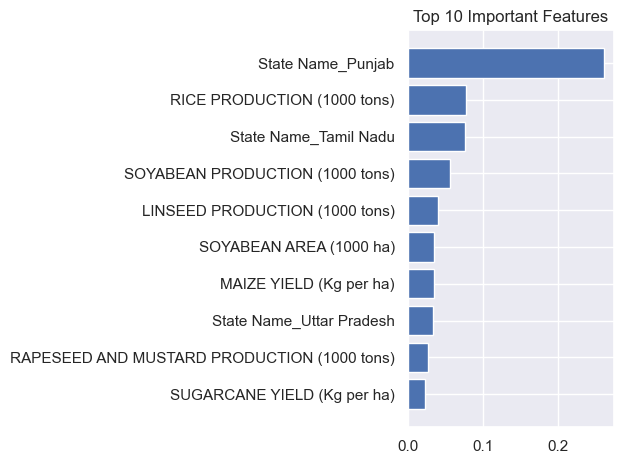

In [77]:
import numpy as np

importances = model.feature_importances_
top_indices = np.argsort(importances)[-10:]

plt.barh(range(len(top_indices)), importances[top_indices], align='center')
plt.yticks(range(len(top_indices)), [X_train.columns[i] for i in top_indices])
plt.title("Top 10 Important Features")
plt.tight_layout()
plt.show()


In [78]:
import joblib
joblib.dump(model, "rice_yield_model.pkl")


['rice_yield_model.pkl']

In [79]:
model = joblib.load("rice_yield_model.pkl")


In [39]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean R²:", scores.mean())


Cross-validated R² scores: [0.89322217 0.91438583 0.87546769 0.89501334 0.90093035]
Mean R²: 0.8958038774597961


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train.values.ravel())
print("Best R² Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)


Best R² Score: 0.8443121446871877
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [46]:
import pandas as pd

y_pred = grid_search.best_estimator_.predict(X_test)
pred_df = pd.DataFrame({
    'Actual': y_test.values.ravel(),
    'Predicted': y_pred
})
pred_df.to_csv("predictions.csv", index=False)


In [47]:
pip install dash jupyter-dash plotly


Note: you may need to restart the kernel to use updated packages.


In [49]:
pred_df = pd.DataFrame({
    'Actual': y_test.values.ravel(),
    'Predicted': model.predict(X_test)
})


In [50]:
pip install dash jupyterlab-dash


Note: you may need to restart the kernel to use updated packages.


In [51]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html

# Sample data for demonstration
actual = [2500, 2700, 3000, 3200, 2800]
predicted = [2600, 2650, 2950, 3100, 2900]

# Create the DataFrame
pred_df = pd.DataFrame({
    'Actual': actual,
    'Predicted': predicted
})

# Initialize Dash app
app = Dash(__name__)

# Create scatter plot
fig = px.scatter(pred_df, x='Actual', y='Predicted', trendline='ols')

# Layout for dashboard
app.layout = html.Div([
    html.H1("Crop Yield Prediction Dashboard"),
    dcc.Graph(figure=fig)
])

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


